In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [24]:
data_dir = "ChestXR"

disease_names = [
    "Abscess", "Ards", "Atelectasis", "Atherosclerosis of the aorta", "Cardiomegaly",
    "Emphysema", "Fracture", "Hydropneumothorax", "Hydrothorax", "Pneumonia",
    "Pneumosclerosis", "Post inflammatory changes", "Post traumatic ribs deformation",
    "Sarcoidosis", "Scoliosis", "Tuberculosis", "Venous congestion"
]


In [25]:
img_width, img_height = 150, 150

num_classes = len(disease_names)

batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 97 images belonging to 17 classes.
Found 13 images belonging to 17 classes.


In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [27]:
epochs = []
loses = []
accuracies = []

steps_per_epoch = max(1, train_generator.samples // batch_size)
validation_steps = max(1, validation_generator.samples // batch_size)

# for epoch in range(30):
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     model.fit(
#         train_generator,
#         steps_per_epoch=train_generator.samples // batch_size,

#     )

#     epochs.append(epoch)
#     loses.append(model.history.history['loss'][-1])
#     accuracies.append(model.history.history['accuracy'][-1])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 50
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps)

Epoch 1/50
6/6 [==============================] - 9s 1s/step - loss: 2.9888 - accuracy: 0.0741 - val_loss: 2.7986 - val_accuracy: 0.1538
Epoch 2/50
6/6 [==============================] - 7s 1s/step - loss: 2.7991 - accuracy: 0.1605 - val_loss: 2.7032 - val_accuracy: 0.1538
Epoch 3/50
6/6 [==============================] - 8s 1s/step - loss: 2.6874 - accuracy: 0.1358 - val_loss: 2.4102 - val_accuracy: 0.3077
Epoch 4/50
6/6 [==============================] - 7s 1s/step - loss: 2.5204 - accuracy: 0.2222 - val_loss: 2.1466 - val_accuracy: 0.3846
Epoch 5/50
6/6 [==============================] - 7s 1s/step - loss: 2.2501 - accuracy: 0.2963 - val_loss: 1.7206 - val_accuracy: 0.6154
Epoch 6/50
6/6 [==============================] - 7s 1s/step - loss: 2.0287 - accuracy: 0.3951 - val_loss: 1.4614 - val_accuracy: 0.6154
Epoch 7/50
6/6 [==============================] - 9s 2s/step - loss: 1.6583 - accuracy: 0.4583 - val_loss: 1.1026 - val_accuracy: 0.5385
Epoch 8/50
6/6 [=========================

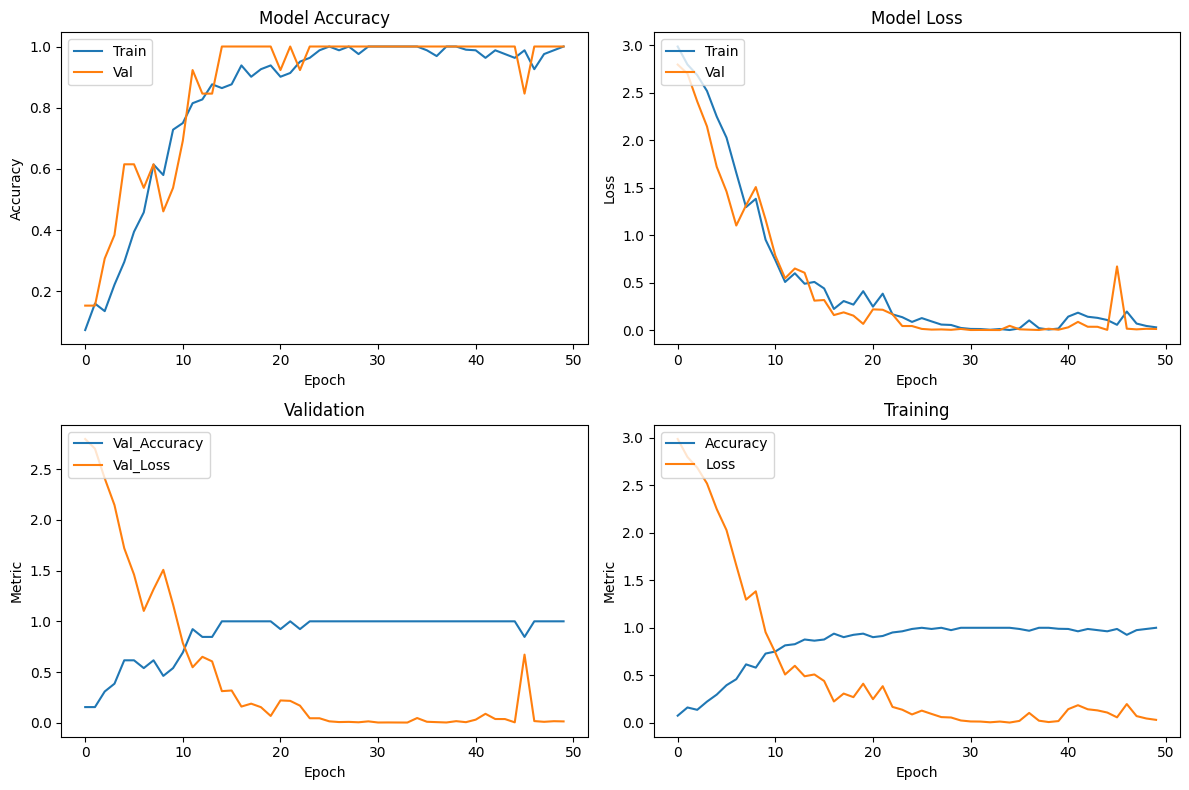

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(history.history['accuracy'])
axs[0, 0].plot(history.history['val_accuracy'])
axs[0, 0].set_title('Model Accuracy')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].legend(['Train', 'Val'], loc='upper left')

axs[0, 1].plot(history.history['loss'])
axs[0, 1].plot(history.history['val_loss'])
axs[0, 1].set_title('Model Loss')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].legend(['Train', 'Val'], loc='upper left')

axs[1, 0].plot(history.history['val_accuracy'])
axs[1, 0].plot(history.history['val_loss'])
axs[1, 0].set_title('Validation')
axs[1, 0].set_ylabel('Metric')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].legend(['Val_Accuracy', 'Val_Loss'], loc='upper left')

axs[1, 1].plot(history.history['accuracy'])
axs[1, 1].plot(history.history['loss'])
axs[1, 1].set_title('Training')
axs[1, 1].set_ylabel('Metric')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].legend(['Accuracy', 'Loss'], loc='upper left')

plt.tight_layout()
plt.show()

In [29]:
model.save("xray_disease_detection_model.h5")